In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

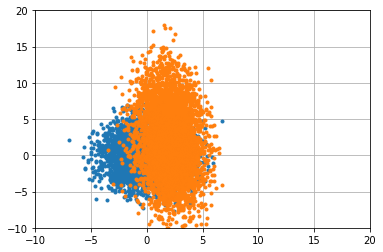

In [50]:

mean = [0,0]
cov = [[3,0],[0,5]]
dataset1 = np.random.multivariate_normal(mean, cov, 5000)

mean = [2,2]
cov = [[2,-1],[-1,20]]

dataset2 = np.random.multivariate_normal(mean, cov, 5000)
# dataset[:50,:] = dataset[:50,:]*-1+[-5,5]
# print(dataset)
plt.plot(dataset1[:,0],dataset1[:,1],'.')
plt.plot(dataset2[:,0],dataset2[:,1],'.')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.grid()





In [51]:
dataset = np.concatenate((dataset1,dataset2),axis=0)
label = np.concatenate((np.zeros(5000),np.ones(5000)))
print(label.shape)



(10000,)


In [52]:

# define the keras model
model = Sequential()
model.add(Dense(100, input_dim=2, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(dataset, label, epochs=10, batch_size=20)



Epoch 1/10
500/500 [==============================] - 1s 839us/step - loss: 0.6569 - accuracy: 0.6321
Epoch 2/10
500/500 [==============================] - 0s 894us/step - loss: 0.5278 - accuracy: 0.7665
Epoch 3/10
500/500 [==============================] - 0s 844us/step - loss: 0.5069 - accuracy: 0.7702
Epoch 4/10
500/500 [==============================] - 0s 903us/step - loss: 0.4873 - accuracy: 0.7688
Epoch 5/10
500/500 [==============================] - 1s 1ms/step - loss: 0.4876 - accuracy: 0.7629
Epoch 6/10
500/500 [==============================] - 1s 1ms/step - loss: 0.4626 - accuracy: 0.7773
Epoch 7/10
500/500 [==============================] - 1s 1ms/step - loss: 0.4513 - accuracy: 0.7867
Epoch 8/10
500/500 [==============================] - 1s 1ms/step - loss: 0.4452 - accuracy: 0.7888
Epoch 9/10
500/500 [==============================] - 1s 1ms/step - loss: 0.4358 - accuracy: 0.7929
Epoch 10/10
500/500 [==============================] - 0s 928us/step - loss: 0.4419 - accura

In [32]:

model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (10, 50)                  150       
_________________________________________________________________
dense_31 (Dense)             (10, 10)                  510       
_________________________________________________________________
dense_32 (Dense)             (10, 5)                   55        
_________________________________________________________________
dense_33 (Dense)             (10, 1)                   6         
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


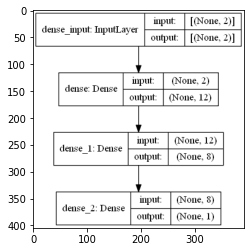

In [34]:
tf.keras.utils.model_to_dot(
    model,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    subgraph=False,
)

fig=plt.imread('model.png')
plt.imshow(fig)

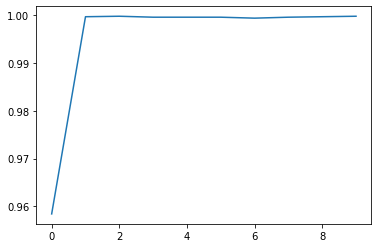

In [37]:

plt.plot(history.history['accuracy'])

In [49]:
a = model.predict([[-60,-50]])
print(a)
print(np.argmax([0.5,a]))

[[0.00373399]]
0
